Main Questions:

- Which U.S. state has the best market conditions for a new restaurant or takeout business?

- What type of restaurant (eg., fast food, casual dining, fine dining, ethnic cuisine) has the highestr success rate?

- What demographic, economic and consumer behavior factors influence restaurant success?

US Population Data (By State) ~ 2020 to 2024

In [31]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import json
from serpapi import GoogleSearch
from tqdm import tqdm

In [ ]:
#Loading the dataset
df = pd.read_csv('Datasets/Population Data (2020-2024).csv')

df.head()

In [ ]:
#Dropping unnecessary rows

#df = df.drop(index=list(range(0, 13)))
#df = df.drop(index = 13)

df.head()

In [ ]:
#Plotting the population by state and selecting the top 5 states

#Extracting state names and population estimates for 2024
states = df["NAME"]
pop_est = df["POPESTIMATE2023"]
top_states = pop_est.nlargest(5).index #index of top 5 states
toppop_est = pop_est[top_states] #Population values of top 5 states
top_states_names = states[top_states] #State names

#plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_states_names, toppop_est, color="skyblue")
plt.xlabel("Population Estimate (2023)")
plt.ylabel("State")
plt.title("Population Estimates for US States in 2023")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
#Top 5 States with Highest Consumer Spending Amounts

cs_df = pd.read_excel('Datasets/pce1024.xlsx')

cs_df.head()

In [ ]:
# Load the dataset for all three states (replace with your file paths)
california_df = pd.read_csv('Datasets/SAINC70_CA_2000_2023.csv')
texas_df = pd.read_csv('Datasets/SAINC70_TX_2000_2023.csv')
florida_df = pd.read_csv('Datasets/SAINC70_FL_2000_2023.csv')

# Define the years and categories you are interested in
years = ['2019', '2020', '2021', '2022', '2023']
categories = ['Current receipts, accrual basis ']

# Create a plot
plt.figure(figsize=(10,6))

# Filter and plot data for California
california_data = california_df[california_df["Description"].isin(categories)]
for index, row in california_data.iterrows():
    plt.plot(years, row[years].values, label="California", color='blue')

# Filter and plot data for Texas
texas_data = texas_df[texas_df["Description"].isin(categories)]
for index, row in texas_data.iterrows():
    plt.plot(years, row[years].values, label="Texas", color='green')

# Filter and plot data for Florida
florida_data = florida_df[florida_df["Description"].isin(categories)]
for index, row in florida_data.iterrows():
    plt.plot(years, row[years].values, label="Florida", color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Income (Thousands of Dollars)')
plt.title('Income Levels Over Time for California, Texas, and Florida (2019-2023)')
plt.legend()

# Adjust the x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Based on the population density and the personal income levels data extracted from the US BEA(Bureau of Economic Analysis), we can say that it would be beneficial to start a food business in California.

In the next step, we will find out which type of restaurant has the most chances of succeeding in California.

In [27]:
#SERP API Key
api_key = os.environ.get("serp_api")

In [41]:
# Define the restaurant types and California cities to search
restaurant_types = ["fast food", "casual dining", "ethnic food", "fine dining"]

# Major California cities to search in
california_cities = [
    "Los Angeles", "San Francisco", "San Diego", "Sacramento", "San Jose",
    "Fresno", "Long Beach", "Oakland", "Bakersfield", "Anaheim",
    "Santa Ana", "Riverside", "Stockton", "Irvine", "Chula Vista"
]


In [ ]:
params = {
    "engine" : "yelp",
    "find_desc" : "casual dining",
    "find_loc" : "Anaheim, California",
    "api_key" : api_key,
    "max_pages" : 2
}

search = GoogleSearch(params)
results = search.get_dict()
results
all_restaurants = []

for restaurant in results.get("organic_results"):
    restaurant_data = {
                    "name": restaurant.get("title", "N/A"),
                    "type": "Casual Dining",
                    "city": "Anaheim",
                    "rating": restaurant.get("rating", "N/A"),
                    "reviews_count": restaurant.get("reviews", "N/A"),
                    "price_range": restaurant.get("price", "N/A"),
                    "link": restaurant.get("link", "N/A"),
                    "categories": [cat.get("title", "") for cat in restaurant.get("categories", [])],
                    "address": restaurant.get("address", "N/A"),
                    "phone": restaurant.get("phone", "N/A")
    }
    all_restaurants.append(restaurant_data)
    
all_restaurants

In [42]:
# Initialize an empty list to store all restaurant data
all_restaurants_data = []

# Loop through each restaurant type and location
for restaurant_type in restaurant_types:
    for city in california_cities:
        # Update the search parameters
        params["find_desc"] = restaurant_type
        params["find_loc"] = f"{city}, California"
        
        # Perform the search
        search = GoogleSearch(params)
        results = search.get_dict()
        
        # Extract restaurant data
        for restaurant in results.get("organic_results", []):
            restaurant_data = {
                "name": restaurant.get("title", "N/A"),
                "type": restaurant_type,
                "city": city,
                "rating": restaurant.get("rating", "N/A"),
                "reviews_count": restaurant.get("reviews", "N/A"),
                "price_range": restaurant.get("price", "N/A"),
                "link": restaurant.get("link", "N/A"),
                "categories": [cat.get("title", "") for cat in restaurant.get("categories", [])],
                "address": restaurant.get("address", "N/A"),
                "phone": restaurant.get("phone", "N/A")
            }
            all_restaurants_data.append(restaurant_data)

# Convert the data into a DataFrame
restaurants_df = pd.DataFrame(all_restaurants_data)

# Export the data to a CSV file
restaurants_df.to_csv("california_restaurants_data.csv", index=False)

print("Data extraction and export completed successfully!")



Data extraction and export completed successfully!


In [43]:
ca_df = pd.read_csv('california_restaurants_data.csv')
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           600 non-null    object 
 1   type           600 non-null    object 
 2   city           600 non-null    object 
 3   rating         600 non-null    float64
 4   reviews_count  600 non-null    int64  
 5   price_range    532 non-null    object 
 6   link           600 non-null    object 
 7   categories     600 non-null    object 
 8   address        0 non-null      float64
 9   phone          584 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 47.0+ KB


C:\Users\akw97\AppData\Local\Temp\ipykernel_3584\4158456811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


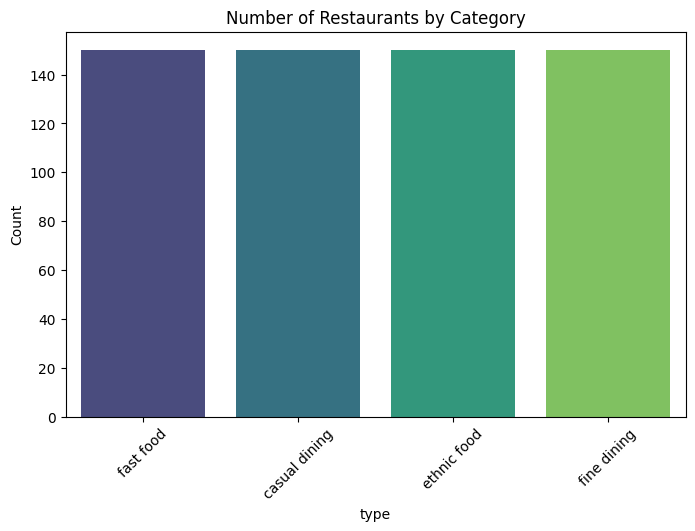

C:\Users\akw97\AppData\Local\Temp\ipykernel_3584\4158456811.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="coolwarm")


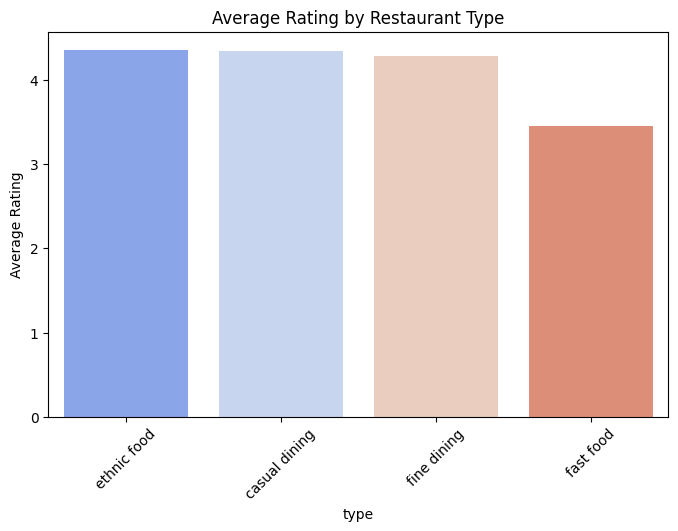

C:\Users\akw97\AppData\Local\Temp\ipykernel_3584\4158456811.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_reviews.index, y=category_reviews.values, palette="magma")


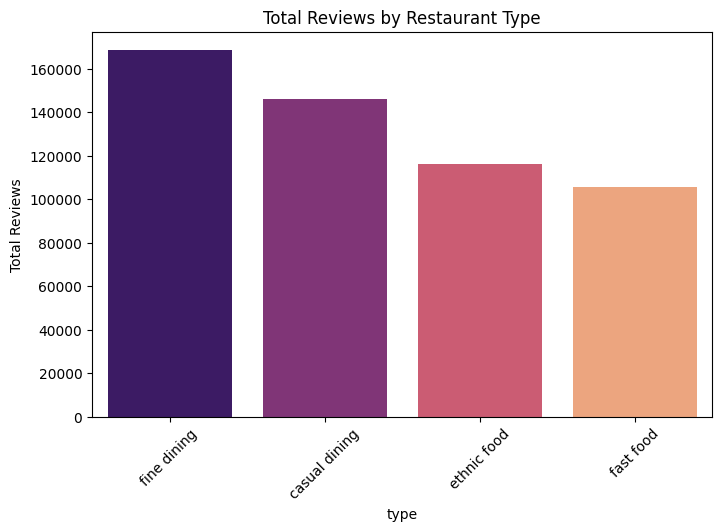

Scraping Progress:   0%|          | 0/60 [1:08:07<?, ?it/s]
C:\Users\akw97\AppData\Local\Temp\ipykernel_3584\4158456811.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="plasma")


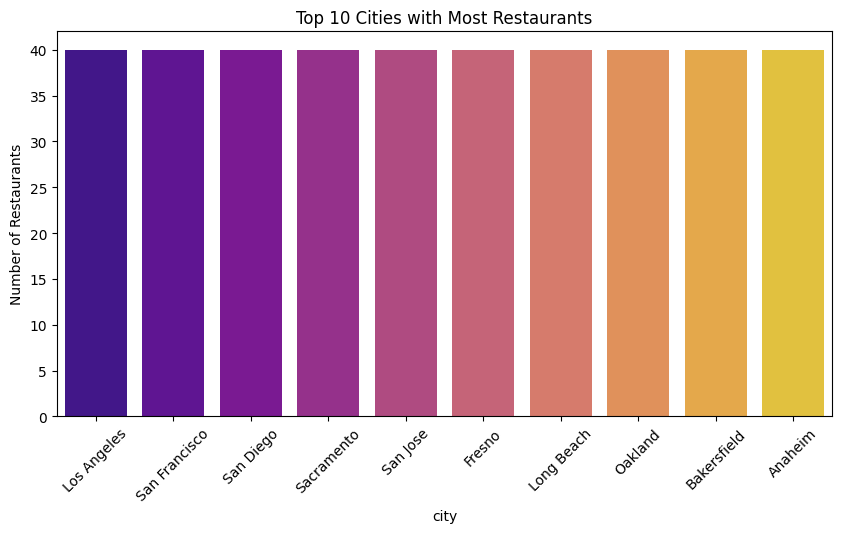

In [44]:
# 🏆 **Category Popularity**
category_counts = ca_df["type"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Restaurants by Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ⭐ **Average Ratings per Category**
category_ratings = ca_df.groupby("type")["rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_ratings.index, y=category_ratings.values, palette="coolwarm")
plt.title("Average Rating by Restaurant Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# 🗣 **Total Reviews per Category**
category_reviews = ca_df.groupby("type")["reviews_count"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_reviews.index, y=category_reviews.values, palette="magma")
plt.title("Total Reviews by Restaurant Type")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45)
plt.show()

# 📍 **Top Cities with Restaurants**
city_counts = ca_df["city"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="plasma")
plt.title("Top 10 Cities with Most Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

Next step : Narrow down on a city and the type of business

Scrape the next city and business type

draw some conclusions from this one california dataset